# Tiền xử lý dữ liệu

## Mục tiêu:
- Đọc dữ liệu World Bank đã tổng hợp (2000–2024)
- Khám phá, làm sạch, và chuẩn hóa dữ liệu
- Chia dữ liệu thành train/test để phục vụ các mô hình Machine Learning

Nguồn dữ liệu: `data/worldbank_2000_2024.csv`


## Bước 1 - Đọc dữ liệu

Import các thư viện cần thiết

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Đọc dữ liệu từ file CSV và loại bỏ các bản ghi trùng lặp để đảm bảo chất lượng dữ liệu.


In [2]:
# Đọc dữ liệu
df = pd.read_csv("../data/worldbank_2000_2024.csv")
print("=== Dữ liệu gốc (5 dòng đầu) ===")
df.head()  

=== Dữ liệu gốc (5 dòng đầu) ===


,Country Name,Country Code,Year,"Population, total",Poverty headcount ratio at $3.00 a day (2021 PPP) (% of population),Population growth (annual %),"Life expectancy at birth, total (years)",GDP per capita (current US$),GDP growth (annual %),People using safely managed sanitation services (% of population),Access to electricity (% of population),People using at least basic drinking water services (% of population),Carbon dioxide (CO2) emissions excluding LULUCF per capita (t CO2e/capita),Population living in slums (% of urban population),"Labor force participation rate, total (% of total population ages 15+) (modeled ILO estimate)"
0,Aruba,ABW,2000,90588.0,NaN,1.030817,72.939,20681.023027,7.622921,NaN,91.7,94.488806,2.965073,0.0,NaN
1,Aruba,ABW,2001,91439.0,NaN,0.935033,73.044,20740.132583,4.182002,NaN,100.0,94.770491,2.969193,NaN,NaN
2,Aruba,ABW,2002,92074.0,NaN,0.692052,73.135,21307.248251,-0.944953,NaN,100.0,95.052176,3.221322,0.0,NaN
3,Aruba,ABW,2003,93128.0,NaN,1.138229,73.236,21949.485996,1.110505,NaN,100.0,95.333861,3.671291,NaN,NaN
4,Aruba,ABW,2004,95138.0,NaN,2.135358,73.223,23700.631990,7.293728,NaN,100.0,95.615545,3.667304,0.0,NaN


## Bước 2 - Tổng quan dữ liệu

Phân tích cấu trúc dữ liệu, kiểu dữ liệu và ý nghĩa của từng thuộc tính. Rút ngắn tên các cột để dễ dàng trong việc phân tích và trực quan hóa.


In [3]:
# Rút ngắn tên các cột để dễ phân tích
df.columns = [
    'country_name', 'country_code', 'year', 'population', 'poverty_ratio',
    'pop_growth', 'life_expectancy', 'gdp_per_capita', 'gdp_growth',
    'sanitation', 'electricity', 'water_access', 'co2_emissions',
    'slum_population', 'labor_force'
]

print("THÔNG TIN TỔNG QUAN VỀ DỮ LIỆU:")
print(f"Kích thước dữ liệu: {df.shape}")
print(f"Số quốc gia: {df['country_name'].nunique()}")
print(f"Khoảng thời gian: {df['year'].min()}-{df['year'].max()}")

print("\nÝ NGHĨA CÁC THUỘC TÍNH:")
print("1. country_name: Tên quốc gia")
print("2. country_code: Mã quốc gia")
print("3. year: Năm")
print("4. population: Tổng dân số")
print("5. poverty_ratio: Tỷ lệ nghèo (% dân số)")
print("6. pop_growth: Tăng trưởng dân số hàng năm (%)")
print("7. life_expectancy: Tuổi thọ trung bình (năm) - TARGET")
print("8. gdp_per_capita: GDP bình quân đầu người (USD)")
print("9. gdp_growth: Tăng trưởng GDP hàng năm (%)")
print("10. sanitation: Tỷ lệ sử dụng dịch vụ vệ sinh an toàn (%)")
print("11. electricity: Tỷ lệ tiếp cận điện (%)")
print("12. water_access: Tỷ lệ sử dụng nước uống cơ bản (%)")
print("13. co2_emissions: Lượng khí thải CO2 bình quân đầu người (tấn)")
print("14. slum_population: Tỷ lệ dân số sống trong khu ổ chuột (%)")
print("15. labor_force: Tỷ lệ tham gia lực lượng lao động (%)")

THÔNG TIN TỔNG QUAN VỀ DỮ LIỆU:
Kích thước dữ liệu: (5425, 15)
Số quốc gia: 217
Khoảng thời gian: 2000-2024

Ý NGHĨA CÁC THUỘC TÍNH:
1. country_name: Tên quốc gia
2. country_code: Mã quốc gia
3. year: Năm
4. population: Tổng dân số
5. poverty_ratio: Tỷ lệ nghèo (% dân số)
6. pop_growth: Tăng trưởng dân số hàng năm (%)
7. life_expectancy: Tuổi thọ trung bình (năm) - TARGET
8. gdp_per_capita: GDP bình quân đầu người (USD)
9. gdp_growth: Tăng trưởng GDP hàng năm (%)
10. sanitation: Tỷ lệ sử dụng dịch vụ vệ sinh an toàn (%)
11. electricity: Tỷ lệ tiếp cận điện (%)
12. water_access: Tỷ lệ sử dụng nước uống cơ bản (%)
13. co2_emissions: Lượng khí thải CO2 bình quân đầu người (tấn)
14. slum_population: Tỷ lệ dân số sống trong khu ổ chuột (%)
15. labor_force: Tỷ lệ tham gia lực lượng lao động (%)


In [4]:
print("\nTHÔNG TIN DỮ LIỆU:")
df.info()


THÔNG TIN DỮ LIỆU:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5425 entries, 0 to 5424
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country_name     5425 non-null   object 
 1   country_code     5425 non-null   object 
 2   year             5425 non-null   int64  
 3   population       5425 non-null   float64
 4   poverty_ratio    1834 non-null   float64
 5   pop_growth       5424 non-null   float64
 6   life_expectancy  5208 non-null   float64
 7   gdp_per_capita   5213 non-null   float64
 8   gdp_growth       5141 non-null   float64
 9   sanitation       3117 non-null   float64
 10  electricity      5135 non-null   float64
 11  water_access     4777 non-null   float64
 12  co2_emissions    4872 non-null   float64
 13  slum_population  2015 non-null   float64
 14  labor_force      4666 non-null   float64
dtypes: float64(12), int64(1), object(2)
memory usage: 635.9+ KB


## Bước 3 - Xử lý giá trị thiếu và giá trị trùng lặp
### Mục tiêu:
- Loại bỏ các giá trị trùng lặp
- Phân tích giá trị thiếu của từng biến
- Dự đoán và điền giá trị thiếu cho các biến có tỷ lệ NaN cao
- Điền giá trị còn lại bằng mean/median phù hợp

### 3.1. Loại bỏ các hàng trùng lặp

In [5]:
print("Kích thước dữ liệu ban đầu:", df.shape)
rows_before = df.shape[0]
# Loại bỏ các hàng trùng lặp
df = df.drop_duplicates()
rows_after = df.shape[0]
removed = rows_before - rows_after

print("Kích thước sau khi loại bỏ trùng lặp:", df.shape)
print(f"Đã loại bỏ {removed} dòng trùng lặp.")

Kích thước dữ liệu ban đầu: (5425, 15)
Kích thước sau khi loại bỏ trùng lặp: (5425, 15)
Đã loại bỏ 0 dòng trùng lặp.


### 3.2. Phân tích giá trị thiếu
- Tính tỷ lệ thiếu của từng cột để nhận diện biến rủi ro.
- Kiểm tra tương quan giữa các biến để chọn tập đặc trưng liên quan mạnh (nhưng khác mục tiêu `life_expectancy`) cho bước 3.3.
- Ghi chú rõ biến nào không được dùng làm predictor (ví dụ target `life_expectancy`).


In [6]:
# Tính tỷ lệ thiếu (%)
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent = missing_percent.sort_values(ascending=False)

# Chỉ hiển thị các giá trị lớn hơn 0
missing_percent = missing_percent[missing_percent > 0]
display(missing_percent)

# Loại bỏ các cột có tỷ lệ thiếu quá cao (> 60%) để giảm rủi ro sai lệch do dự đoán
HIGH_MISSING_COLS = ["poverty_ratio", "slum_population"]
df = df.drop(columns=HIGH_MISSING_COLS)
print(f"Đã loại bỏ các cột thiếu >60%: {HIGH_MISSING_COLS}")

numeric_cols = df.select_dtypes(include=[np.number]).columns


poverty_ratio      66.193548
slum_population    62.857143
sanitation         42.543779
labor_force        13.990783
water_access       11.944700
co2_emissions      10.193548
electricity         5.345622
gdp_growth          5.235023
life_expectancy     4.000000
gdp_per_capita      3.907834
pop_growth          0.018433
dtype: float64

Đã loại bỏ các cột thiếu >60%: ['poverty_ratio', 'slum_population']


Hai thuộc tính `poverty_ratio` và `slum_population` có tỷ lệ thiếu >60% nên việc dự đoán/điền sẽ rủi ro (dễ sai lệch và tạo nhiễu). Vì vậy, hai cột này được loại bỏ khỏi bộ dữ liệu; chỉ giữ `sanitation` để xử lý điền thiếu ở bước tiếp theo.

### 3.3. Vẽ ma trận tương quan giữa các thuộc tính

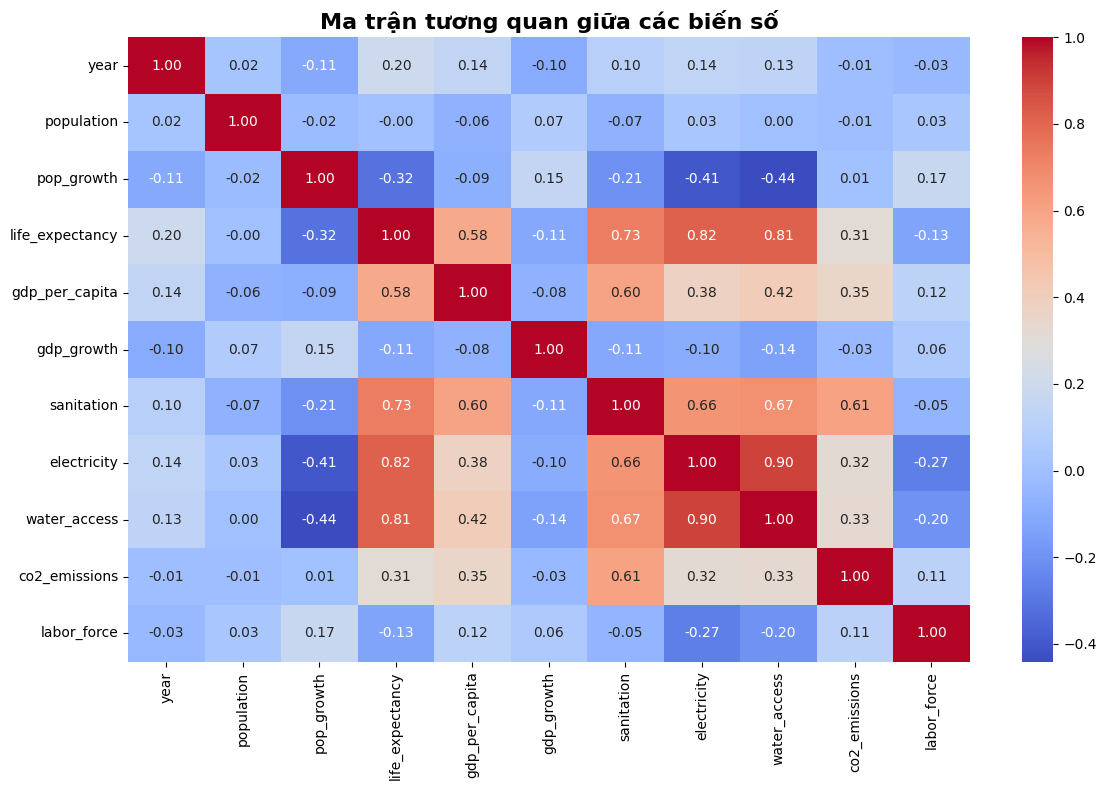

In [7]:
# Hiển thị heatmap tương quan để phục vụ việc lựa chọn biến dự đoán
plt.figure(figsize=(12, 8))
sns.heatmap(df.select_dtypes(include=[np.number]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Ma trận tương quan giữa các biến số", fontsize=16, fontweight='bold')
plt.tight_layout()

Qua ma trận tương quan, ta thấy `sanitation`, `electricity`, `water_access` và `gdp_per_capita` là các biến quan trọng nhất, mang tính quyết định tới biến mục tiêu `life_expectancy`(có hệ số tương quan đều lớn hơn 0.5)

### 3.4. Điền giá trị thiếu cho các cột ngoài sanitation (theo Skewness)
Với các đặc trưng  có tỷ lệ dữ liệu thiếu ít, ta sẽ điền các giá trị thiếu bằng trung bình (mean) hoặc trung vị (median). Ta sẽ sử dụng 'skewness' (skewness là thước đo độ bất đối xứng của phân phối dữ liệu so với trung bình (mean)) để đánh giá xem sẽ dùng mean hay median.
<table>
  <thead>
    <tr><th>Giá trị của skewness (t)</th><th>Phương pháp</th></tr>
  </thead>
  <tbody>
    <tr><td><code>|t| &gt; 0.5</code></td><td>Median</td></tr>
    <tr><td><code>|t| &le; 0.5</code></td><td>Mean</td></tr>
  </tbody>
</table>

In [8]:
#  Tính Skewness cho từng cột
print("\nGIÁ TRỊ SKEWNESS VÀ PHƯƠNG PHÁP ĐIỀN GIÁ TRỊ THIẾU:\n")

# Loại bỏ các cột sẽ xử lý riêng khi điền dữ liệu
exclude_cols = ["sanitation"]
cols_to_fill = [col for col in numeric_cols if col not in exclude_cols]

for col in cols_to_fill:
    skew_val = df[col].skew()
    if df[col].isna().sum() > 0:
        if -0.5 <= skew_val <= 0.5:
            method = "Mean"
            fill_value = df[col].mean()
        else:
            method = "Median"
            fill_value = df[col].median()

        
        df[col] = df[col].fillna(fill_value)

        print(f"- {col:<20}: Skewness = {skew_val:>6.3f} → Điền bằng {method}")
    else:
        print(f"- {col:<20}: Skewness = {skew_val:>6.3f} → Không có giá trị thiếu")



GIÁ TRỊ SKEWNESS VÀ PHƯƠNG PHÁP ĐIỀN GIÁ TRỊ THIẾU:

- year                : Skewness =  0.000 → Không có giá trị thiếu
- population          : Skewness =  8.898 → Không có giá trị thiếu
- pop_growth          : Skewness =  0.968 → Điền bằng Median
- life_expectancy     : Skewness = -0.828 → Điền bằng Median
- gdp_per_capita      : Skewness =  3.181 → Điền bằng Median
- gdp_growth          : Skewness =  1.342 → Điền bằng Median
- electricity         : Skewness = -1.416 → Điền bằng Median
- water_access        : Skewness = -1.420 → Điền bằng Median
- co2_emissions       : Skewness =  7.498 → Điền bằng Median
- labor_force         : Skewness = -0.218 → Điền bằng Mean


### 3.5. Điền giá trị thiếu cho `sanitation` (nội suy theo năm + median fallback)
### Mục tiêu:
- Giữ tính liên tục theo thời gian: nội suy tuyến tính theo `year` trong từng `country_code`.
- Với các trường hợp vẫn còn thiếu dữ liệu (thiếu ở đầu/cuối chuỗi hoặc thiếu quá dài), ta điền bằng median của chính quốc gia đó.
- Nếu quốc gia không có đủ dữ liệu để tính median, dùng median toàn cục làm fallback.


In [9]:
def interpolate_by_year(df, target, group_col="country_code", sort_col="year"):
    # Nội suy tuyến tính theo từng quốc gia để giữ tính liên tục theo thời gian
    def _apply_interp(group):
        group = group.sort_values(sort_col)
        group[target] = group[target].interpolate(method="linear", limit_direction="both")
        return group
    return df.groupby(group_col, group_keys=False).apply(_apply_interp)

san_before = df["sanitation"].isna().sum()
df = interpolate_by_year(df, "sanitation")
san_after_interp = df["sanitation"].isna().sum()

# Điền phần còn thiếu bằng median theo quốc gia, sau đó fallback median toàn cục
country_median = df.groupby("country_code")["sanitation"].transform("median")
df["sanitation"] = df["sanitation"].fillna(country_median)
san_after_country = df["sanitation"].isna().sum()

df["sanitation"] = df["sanitation"].fillna(df["sanitation"].median())
san_after_global = df["sanitation"].isna().sum()

print(
    f"sanitation: Nội suy {san_before - san_after_interp} dòng\n"
    f"Điền median theo quốc gia {san_after_interp - san_after_country} dòng\n"
    f"Fallback median toàn cục {san_after_country - san_after_global} dòng"
)


sanitation: Nội suy 333 dòng
Điền median theo quốc gia 0 dòng
Fallback median toàn cục 1975 dòng


C:\Users\DELL\AppData\Local\Temp\ipykernel_24800\3819323729.py:7: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(group_col, group_keys=False).apply(_apply_interp)


In [10]:
# Kiểm tra lại dữ liệu sau khi điền
nan_counts = df.isna().sum().sum()
print(f"Tổng số giá trị NaN còn lại sau khi xử lý: {nan_counts}")

# Xem dữ liệu đầu tiên sau khi điền giá trị
df.head()

Tổng số giá trị NaN còn lại sau khi xử lý: 0


,country_name,country_code,year,population,pop_growth,life_expectancy,gdp_per_capita,gdp_growth,sanitation,electricity,water_access,co2_emissions,labor_force
0,Aruba,ABW,2000,90588.0,1.030817,72.939,20681.023027,7.622921,51.957266,91.7,94.488806,2.965073,60.895221
1,Aruba,ABW,2001,91439.0,0.935033,73.044,20740.132583,4.182002,51.957266,100.0,94.770491,2.969193,60.895221
2,Aruba,ABW,2002,92074.0,0.692052,73.135,21307.248251,-0.944953,51.957266,100.0,95.052176,3.221322,60.895221
3,Aruba,ABW,2003,93128.0,1.138229,73.236,21949.485996,1.110505,51.957266,100.0,95.333861,3.671291,60.895221
4,Aruba,ABW,2004,95138.0,2.135358,73.223,23700.631990,7.293728,51.957266,100.0,95.615545,3.667304,60.895221


### 3.6. Lưu dữ liệu chưa chuẩn hóa

In [11]:
# Lưu dữ liệu đã xử lý (chưa chuẩn hóa)
import os

os.makedirs("../data/processed", exist_ok=True)
df.to_csv("../data/processed/processed_data.csv", index=False)
# Hiển thị dữ liệu khi chưa chuẩn hóa
print("DỮ LIỆU CHƯA CHUẨN HÓA:\n")
df.head()

DỮ LIỆU CHƯA CHUẨN HÓA:



,country_name,country_code,year,population,pop_growth,life_expectancy,gdp_per_capita,gdp_growth,sanitation,electricity,water_access,co2_emissions,labor_force
0,Aruba,ABW,2000,90588.0,1.030817,72.939,20681.023027,7.622921,51.957266,91.7,94.488806,2.965073,60.895221
1,Aruba,ABW,2001,91439.0,0.935033,73.044,20740.132583,4.182002,51.957266,100.0,94.770491,2.969193,60.895221
2,Aruba,ABW,2002,92074.0,0.692052,73.135,21307.248251,-0.944953,51.957266,100.0,95.052176,3.221322,60.895221
3,Aruba,ABW,2003,93128.0,1.138229,73.236,21949.485996,1.110505,51.957266,100.0,95.333861,3.671291,60.895221
4,Aruba,ABW,2004,95138.0,2.135358,73.223,23700.631990,7.293728,51.957266,100.0,95.615545,3.667304,60.895221


## Bước 4 - Chia dữ liệu Train/Validation/Test

### Mục tiêu:
- Chuẩn bị dữ liệu cho bước huấn luyện mô hình dự đoán `life_expectancy`.
- Chia dữ liệu thành 3 tập: train, validation và test.
- Chia theo tỷ lệ: 60% train/ 20% validation/ 20% test.
- Lưu 3 file riêng biệt vào thư mục `../data/processed/` để tiện sử dụng sau này.

In [12]:
from sklearn.model_selection import train_test_split

# Bước 1: Train (60%) và tập tạm thời (40%)
train_df, temp_df = train_test_split(
    df, test_size=0.40, random_state=42, shuffle=True
)

# Bước 2: Chia tập tạm thời thành validation (20%) và Test (20%)
val_df, test_df = train_test_split(
    temp_df, test_size=0.50, random_state=42, shuffle=True
)

os.makedirs("../data/processed", exist_ok=True)

print("Kích thước:")
print("Train:", train_df.shape)
print("Validation:", val_df.shape)
print("Test:", test_df.shape)

Kích thước:
Train: (3255, 13)
Validation: (1085, 13)
Test: (1085, 13)


## Bước 5 - Chuẩn hóa dữ liệu

### Mục tiêu:
- Chuẩn hóa dữ liệu số để đảm bảo các biến có cùng thang đo, giúp mô hình học hiệu quả hơn.
- Sử dụng StandardScaler (Z-score) cho các biến số.
- Không chuẩn hóa các biến phân loại như `country_name`, `country_code` vì chúng mang ý nghĩa phân loại, hữu ích cho mô hình.
- Không chuẩn hóa các cột `year` và `life_expectancy` vì:
  - `year` là chỉ số thời gian, mang ý nghĩa tuần tự, không cần chuẩn hóa.
  - `life_expectancy` là biến mục tiêu (target), việc chuẩn hóa hay không sẽ tùy thuộc vào thuật toán dự đoán sau này.

---

### Phương pháp chuẩn hóa: Z-score

$Z = \frac{X - \mu}{\sigma}$

Trong đó:
- $\mu$: giá trị trung bình của biến  
- $\sigma$ : độ lệch chuẩn của biến  
Sau chuẩn hóa, mỗi biến sẽ có trung bình = 0 và độ lệch chuẩn = 1.

In [13]:
from sklearn.preprocessing import StandardScaler

# Chọn các cột dạng số cần chuẩn hoá (trừ year và life_expectancy)
cols_to_scale = [
    c for c in train_df.select_dtypes(include=['float64', 'int64']).columns
    if c not in ['life_expectancy', 'year']
]

scaler = StandardScaler()
train_df[cols_to_scale] = scaler.fit_transform(train_df[cols_to_scale])
val_df[cols_to_scale] = scaler.transform(val_df[cols_to_scale])
test_df[cols_to_scale] = scaler.transform(test_df[cols_to_scale])

# Lưu lại dữ liệu sau chuẩn hóa
train_df.to_csv("../data/processed/train.csv", index=False)
val_df.to_csv("../data/processed/val.csv", index=False)
test_df.to_csv("../data/processed/test.csv", index=False)

# Hiển thị dữ liệu sau chuẩn hóa
print("DỮ LIỆU HUẤN LUYỆN SAU KHI CHUẨN HÓA:\n")
train_df.head()

DỮ LIỆU HUẤN LUYỆN SAU KHI CHUẨN HÓA:



,country_name,country_code,year,population,pop_growth,life_expectancy,gdp_per_capita,gdp_growth,sanitation,electricity,water_access,co2_emissions,labor_force
4119,Romania,ROU,2019,-0.100387,-1.101137,75.607317,-0.107887,0.079336,1.170060,0.621932,0.746494,-0.047183,-0.871164
3406,Mauritius,MUS,2006,-0.235882,-0.500838,72.432195,-0.405891,0.241659,-0.060699,0.586683,0.718065,-0.221970,-0.189257
58,Angola,AGO,2008,-0.083899,1.500859,55.281000,-0.470953,1.327705,-0.060699,-1.545881,-2.268636,-0.432669,1.598947
76,Albania,ALB,2001,-0.222240,-1.349940,75.083000,-0.584364,0.930412,-1.071878,0.600783,-0.024271,-0.404910,-0.104497
796,Central African Republic,CAF,2021,-0.206911,0.236338,40.279000,-0.618434,-0.427187,-1.640089,-2.349558,-3.008624,-0.529029,1.172890


## Kết luận

Sau khi hoàn thành 5 bước tiền xử lý dữ liệu, bộ dữ liệu hiện đã sạch, không còn giá trị thiếu, không có trùng lặp và sẵn sàng cho bước huấn luyện mô hình dự đoán tuổi thọ trung bình (`life_expectancy`).

### Kết quả cuối cùng:
| Tập dữ liệu | Tỉ lệ | Ghi chú |
|------------|------|---------|
| Train | 60% mẫu | Dùng để huấn luyện mô hình |
| Validation | 20% mẫu | Dùng để điều chỉnh tham số, chọn mô hình tốt nhất |
| Test | 20% mẫu | Dùng để đánh giá mô hình cuối cùng |

### Tổng kết:
- Dữ liệu đã được làm sạch hoàn toàn: không trùng lặp, không giá trị thiếu.  
- Các cột dạng số đã được chuẩn hóa Z-score (trừ `life_expectancy`, `year`).  
- Dữ liệu đã được chia thành train/ validation/ test để đảm bảo đánh giá mô hình khách quan.  
- Toàn bộ quy trình được thực hiện rõ ràng, tuần tự và logic.